# nmi | spring 2024
## demo 02 | homework 02 : rootfinding
## vicious, sid


finding roots for $y = f(x) = x^3 + x - 1$ using various methods.


### global functions, variables


In [ ]:
# debug
gb_debug = True

# limits, programmatic
gepsilon = 1e-5 # 0.00001 # max error
gimax = 100 # max iterations

# x interval
gx_from = 0.
gx_thru = 1.

# x, educated guess
gx0 = 0.60

def f(ax):
  rc = ax**3 + ax - 1.
  if gb_debug:
    print(f"inside f: f({ax}) = {rc}")
  return rc


### bisection

#### algorithm


```
def f(x) = x^3 + x - 1

def hc_bisection(aa,ab)
  epsilon = 0.01 # bc im lazy
  a = aa,b = ab

  while (b-a)/2. > epsilon
    c = (a+b)/2.
    fc = f(c)
    if fc = 0
      stop
    elsif fa*fc < 0
      b = c
      # fb = f(b)
    else
      a = c
      fa = fc
```


#### code

In [ ]:
def f_bisection(aa,ab,aepsilon):
  # do stuff

  return c,isteps # root, iterations


##### demo


In [ ]:
def bisection(aa,ab,aepsilon):
  #a = aa,b = ab
  a = aa;b = ab
  # isteps = 0
  # < do something here >

  fa = f(a)

  #while (b-a)/2. > epsilon
  while (b-a)/2. > aepsilon:
    #c = (a+b)/2.
    c = (a+b)/2.
    #fc = f(c)
    fc = f(c)
    #if fc = 0
    if fc == 0:
      #stop
      break;
    #elsif fa*fc < 0
    elif fa*fc < 0:
      #b = c
      b = c
      # fb = f(b) # leave as comment, unneeded
    #else
    else:
      #a = c
      a = c
      #fa = f(a)
      fa = fc
      # isteps = isteps + 1
      # < do something here >

  return c,isteps # root, iterations


#### results


In [ ]:
root,steps = f_bisection(gx_from,gx_thru,gepsilon)
print(f"given max error {gepsilon:.5f}, found root = {root:.5f} at {steps} iterations")


##### self-check

In [ ]:
from scipy import optimize

sol = optimize.root(f, [0.6])
sol.x

that is, for the purposes of error analysis, you can use the best python answer to coded problems as the comparatively true answer.

### fixed-point

<font color = "blue">not needed for homework; for continuity of methods.</font>

#### algorithm

$x_{i+1} = x_{i} - f(x_{i})$


#### code, static f(x) and <font color=red>what can go wrong</font>

In [ ]:
# fixed point
def f_fpi(ax0,aepsilon,aimax):
  rc = 0
  isteps = 0
  x = ax0
  fx = f(x)
  while (abs(fx - x) > aepsilon) and (isteps <= aimax):
    x = fx
    fx = f(x)
    isteps += 1 # common shortcut for isteps = isteps + 1
  rc = x
  return rc,isteps

##### first (lol)

In [ ]:
x0 = gx_from
root,steps = f_fpi(x0,gepsilon,gimax)
print(f"given max error {gepsilon:.5f}, found root = {root:.5f} starting at {x0} with {steps} iterations")

x0 = gx_thru
root,steps = f_fpi(x0,gepsilon,gimax)
print(f"given max error {gepsilon:.5f}, found root = {root:.5f} starting at {x0} with {steps} iterations")

x0 = gx0
root,steps = f_fpi(x0,gepsilon,gimax)
print(f"given max error {gepsilon:.5f}, found root = {root:.5f} starting at {x0} with {steps} iterations")


##### later (fixing, un/doable)

In [ ]:
# very rudimentary exception handling
try:
  x0 = gx0
  root,steps = f_fpi(x0,gepsilon,gimax)
  print(f"given max error {gepsilon:.5f}, found root = {root:.5f} starting at {x0} with {steps} iterations")
except:
  print("oh noes")

inside f: f(0.6) = -0.18400000000000005
inside f: f(-0.18400000000000005) = -1.190229504
inside f: f(-1.190229504) = -3.8763636938946355
inside f: f(-3.8763636938946355) = -63.12336233840013
inside f: f(-63.12336233840013) = -251582.8768554049
inside f: f(-251582.8768554049) = -1.5923672500891132e+16
inside f: f(-1.5923672500891132e+16) = -4.0376596785907655e+48
inside f: f(-4.0376596785907655e+48) = -6.582473699994703e+145
oh noes


#### does this fixed point iteration method work at all?


In [ ]:
# fixed point iteration w a fixed-point

import math

def f2(ax):
  rc = math.cos(ax)
  #rc = cos(ax)
  if gb_debug:
    print(f"inside f2: f({ax}) = {rc}")
  return rc

def f_fpi_waf(af,ax0,aerrmax,aimax): # w function as argument
  rc = 0
  isteps = 0
  x = ax0
  fx = af(x)
  while (abs(fx - x) > aerrmax) and (isteps <= aimax):
    x = fx
    fx = af(x)
    isteps += 1 # common shortcut for isteps = isteps + 1
  rc = x
  return rc,isteps

try:
  x0 = 0.5
  root,steps = f_fpi_waf(f2,x0,gepsilon,gimax)
  print(f"given max error {gepsilon:.5f}, found root = {root:.5f} starting at {x0} with {steps} iterations")
except:
  print("oh noes")


inside f2: f(0.5) = 0.8775825618903728
inside f2: f(0.8775825618903728) = 0.6390124941652592
inside f2: f(0.6390124941652592) = 0.8026851006823349
inside f2: f(0.8026851006823349) = 0.6947780267880062
inside f2: f(0.6947780267880062) = 0.7681958312820161
inside f2: f(0.7681958312820161) = 0.719165445942419
inside f2: f(0.719165445942419) = 0.752355759421527
inside f2: f(0.752355759421527) = 0.7300810631378233
inside f2: f(0.7300810631378233) = 0.7451203413514401
inside f2: f(0.7451203413514401) = 0.7350063090148431
inside f2: f(0.7350063090148431) = 0.7418265226432459
inside f2: f(0.7418265226432459) = 0.7372357254422314
inside f2: f(0.7372357254422314) = 0.7403296518782632
inside f2: f(0.7403296518782632) = 0.7382462383322335
inside f2: f(0.7382462383322335) = 0.7396499627696612
inside f2: f(0.7396499627696612) = 0.7387045393569833
inside f2: f(0.7387045393569833) = 0.7393414522812101
inside f2: f(0.7393414522812101) = 0.7389124493321031
inside f2: f(0.7389124493321031) = 0.7392014441

#### code, <font color=blue>re-rig $g(x)$</font>


##### fpi, v2: f(x) as argument

In [ ]:
# fixed point
def f_fpi2(af,ax0,aepsilon,aimax):
  rc = 0
  isteps = 0
  x = ax0
  gx = af(x)
  while (abs(gx - x) > aepsilon) and (isteps < aimax):
    x = gx
    gx = af(x)
    isteps += 1 # common shortcut for isteps = isteps + 1
  rc = x
  return rc,isteps

##### $g_1(x) = 1 - x^3$

In [ ]:
def g1(ax):
  rc = 1. - ax**3
  if gb_debug:
    print(f"inside g1({ax}) = {rc}")
  return rc

In [ ]:
x0 = 0.5
g1_root,g1_steps = f_fpi2(g1,x0,gepsilon,gimax)
print(f"\nroot {g1_root} from {x0} with {g1_steps} steps of max {gimax} and ε {gepsilon}")

inside g1(0.5) = 0.875
inside g1(0.875) = 0.330078125
inside g1(0.330078125) = 0.9640374705195427
inside g1(0.9640374705195427) = 0.10405418832767732
inside g1(0.10405418832767732) = 0.9988733767808354
inside g1(0.9988733767808354) = 0.003376063247859995
inside g1(0.003376063247859995) = 0.999999961520296
inside g1(0.999999961520296) = 1.1543910749534092e-07
inside g1(1.1543910749534092e-07) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1.0) = 0.0
inside g1(0.0) = 1.0
inside g1(1

##### $g_2(x) = (1 - x)^{\frac{1}{3}}$

ie, using $x^3$ instead of $x$ on the left side of fpi, $x^3 = 1 - x$. also, cube root reduces order.

In [ ]:
def g2(ax):
  rc = (1. - ax)**(1/3)
  if gb_debug:
    print(f"inside g2({ax}) = {rc}")
  return rc

In [ ]:
x0 = 0.5
g2_root,g2_steps = f_fpi2(g2,x0,gepsilon,gimax)
print(f"\nroot {g2_root} from {x0} with {g2_steps} steps of max {gimax} and ε {gepsilon}")

inside g2(0.5) = 0.7937005259840998
inside g2(0.7937005259840998) = 0.5908801132751771
inside g2(0.5908801132751771) = 0.7423639321680063
inside g2(0.7423639321680063) = 0.6363102034816613
inside g2(0.6363102034816613) = 0.7138008141442069
inside g2(0.7138008141442069) = 0.6590061456223998
inside g2(0.6590061456223998) = 0.6986326057302191
inside g2(0.6986326057302191) = 0.670448496228072
inside g2(0.670448496228072) = 0.6907291205891408
inside g2(0.6907291205891408) = 0.6762589249268274
inside g2(0.6762589249268274) = 0.6866455368644897
inside g2(0.6866455368644897) = 0.6792223398970035
inside g2(0.6792223398970035) = 0.6845440054697164
inside g2(0.6845440054697164) = 0.680737373803562
inside g2(0.680737373803562) = 0.6834646031717696
inside g2(0.6834646031717696) = 0.6815129209547558
inside g2(0.6815129209547558) = 0.6829107343858817
inside g2(0.6829107343858817) = 0.681910189621121
inside g2(0.681910189621121) = 0.6826266706195234
inside g2(0.6826266706195234) = 0.682113758124644
in

##### $g_3(x) = \frac{1+2x^3}{1+3x^2}$

ie, add $2x^3$ to each side of $f(x)$ to reduce its order. for why "$2$" in "$2x^3$", consider what happens if lhopital.

$f(x) = x^3+x-1 = 0 \Rightarrow x^3 + x - 1 + 2x^3 = 0 + 2x^3 \Rightarrow (3x^2 + 1)\cdot x = 1 + 2x^3 \Rightarrow x = \frac{1+2x^3}{1+3x^2} = g(x)$.

In [ ]:
def g3(ax):
  rc = (1. + 2*ax**3)/(1. + 3*ax**2)
  if gb_debug:
    print(f"inside g3({ax}) = {rc}")
  return rc

In [ ]:
x0 = 0.5
g3_root,g3_steps = f_fpi2(g3,x0,gepsilon,gimax)
print(f"\nroot {g3_root} from {x0} with {g3_steps} steps of max {gimax} and ε {gepsilon}")

inside g3(0.5) = 0.7142857142857143
inside g3(0.7142857142857143) = 0.6831797235023042
inside g3(0.6831797235023042) = 0.6823284233045783
inside g3(0.6823284233045783) = 0.682327803828347

root 0.6823284233045783 from 0.5 with 3 steps of max 100 and ε 1e-05


##### usw


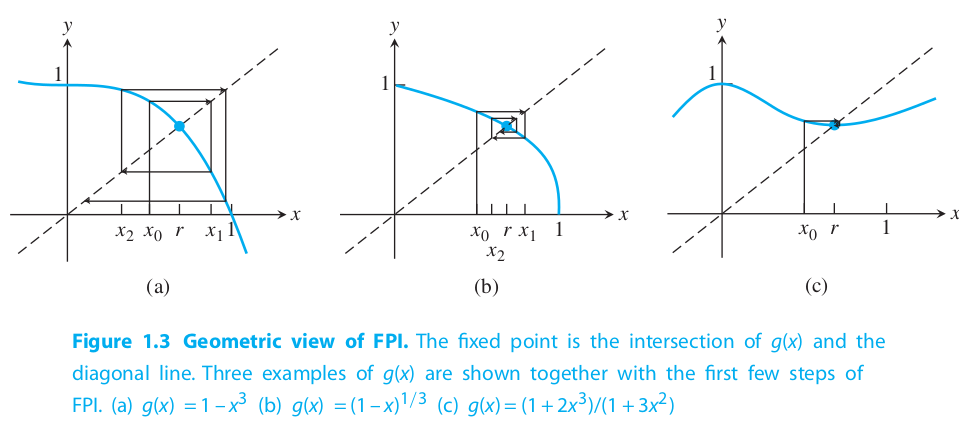

for completeness, fixed point iteration [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html).
</br></br>

for completeness, a plot of $y$.
</br>

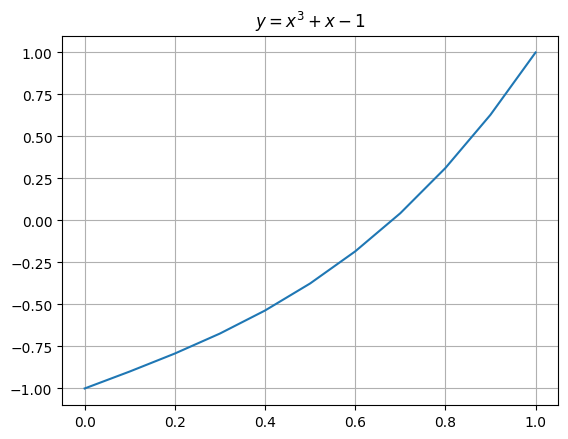

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(0.0, 1.1, 0.1)

gb_debug = False
plt.figure()
plt.plot(xs,f(xs))
plt.title("$y=x^3+x-1$")
plt.grid(True)
gb_debug = True


### newton-raphson

#### algorithm

newton-raphson: $x_{new} = x_{old} - \frac{f(x_{old})}{f'(x_{old})}$


```
icount = 0
fx = f(x_old)
while (abs(fx) > epsilon) and (icount <= imax):
  x_new = x_old - f(x_old)/f'(x_old)
  fx = f(x_new)
  x_old = x_new
  icount = icount + 1
return x_old
```



##### algorithm, lecture



```
function fpi(g,x0,epsilon,imax)

function g(x)
  return x - f(x)/df(x)
```


#### code

In [ ]:
def df(ax):
  rc = 0;

  # do stuff

  return rc

def f_newton(af,adf,ax,aepsilon,aimax):
  root = 0;iterations = 0

  # do stuff

  return root,iterations

#### results

In [ ]:
# bonus code

from scipy import optimize

root_mod = f_newton(f,df,gx0,gepsilon,gimax)
print() # spacer
root_sys = optimize.newton(f,gx0)

print(f"mine {root_mod} vs python {root_sys}")

### secant method

#### algorithm

secant: $x_{i+1} = x_i - f(x_i)\cdot\frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}$
</br></br>

```
icount = 0

fx_old = f(x_old)
if abs(fx_old) < epsilon # epsilon ~ eta
  return x_old
fx_older = f(x_older)
if abs(fx_older) < epsilon # epsilon ~ eta
  return x_older

dq = (fx_old - fx_older)/(x_old - x_older)
x_new = x_old - fx_old/dq
fx = f(x_new)
icount = icount + 1

# while (abs(fx) > epsilon) and (icount <= imax): # epsilon ~ eta
while (abs(x_new - x_old) > epsilon) and (icount <= imax):
  x_older = x_old
  fx_older = fx_old
  x_old = x_new
  fx_old = fx
  dq = (fx_old - fx_older)/(x_old - x_older)
  x_new = x_old - fx_old/dq
  fx = f(x_new)
  icount = icount + 1

return x_new
```



#### code

In [ ]:
def qf(af,ax1,ax2):
  # difference quotient here, plz

  return rc

def f_secant(af,ax1,ax2,aepsilon,aimax):
  root = 0;iterations = 0

  # do some stuffs here

  # dont be like me and forget to put values into root,iteration here
  return root,iterations


#### results

In [ ]:
# bonus code

from scipy import optimize

x1 = gx0;x2 = gx0+0.1
root_mod = f_secant(f,x1,x2,gepsilon,gimax)
print() # spacer
root_sys = optimize.root_scalar(f=f,x0=gx0,method='secant')

print(f"mine {root_mod} vs python {root_sys}")
